In [2]:
import pandas as pd
import numpy as np

import seaborn as sns

In [4]:
df = pd.read_csv('cleaned_df2df1_train.csv')

/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (0,1,3,5,7,8,13,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
(df == 0).sum()

<<<<<<< HEAD    0
dtype: int64

In [9]:
(df == 0).sum()

<<<<<<< HEAD    0
dtype: int64

In [3]:
df1['status_group'] = df1['status_group'].replace(to_replace =["functional needs repair", "non functional"],  
                            value ="needs repair")

In [4]:
df2.shape

(59400, 40)

In [5]:
df2.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [6]:
#df2.isna().sum()

In [7]:
#df2['id'].duplicated().any()

In [11]:
### Relevant features we want to include for modeling
display((df['funder']==0).sum())
display((df['scheme_management']==0).sum())
display((df['scheme_name']==0).sum())
display((df['extraction_type_group']==0).sum())
display((df['management']==0).sum())
display((df['water_quality']==0).sum())
display((df['quantity']==0).sum())
display((df['amount_tsh']==0).sum())
display((df['construction_year']==0).sum())
display((df['population']==0).sum())
display((df['gps_height']==0).sum())
display((df['public_meeting']==0).sum())
display((df['permit']==0).sum())

0

0

0

0

0

0

0

32514

16176

17085

16144

4348

15340

## Dropping NaNs

**funder**
- 3,645 NaNs (Dropped NaNs)

**scheme_management**
- 3,877 NaNs (Dropped NaNs)

**public_meeting** 
- 3,334 NaNs (Dropped NaNs)

**permit** 
- 3,057 NaNs (Dropped NaNs)


In [9]:
df2.dropna(subset=['funder', 'scheme_management', 'public_meeting', 'permit', 'installer'], inplace=True)

### Concatting DataFrame 1

In [10]:
df = pd.merge(df1, df2, on='id', how='inner', indicator=True)

In [23]:
#df_final.isna().sum()

In [38]:
#ax = sns.distplot(x=df['amount_tsh'], showfliers= False)

In [39]:
df2['construction_year'].isna().sum()

0

In [25]:
df['construction_age'] = 2013 - df['construction_year']
display(df['construction_age'].isna().sum())
display((df['construction_age']==0).sum())

0

134

In [26]:
df['construction_age'] = df['construction_age'].replace(2013, 0)
display(df['construction_age'].isna().sum())
display((df['construction_age']==0).sum())

0

16310

In [27]:
df['construction_age'].describe()

count    48651.000000
mean        10.858872
std         12.836953
min          0.000000
25%          0.000000
50%          5.000000
75%         18.000000
max         53.000000
Name: construction_age, dtype: float64

In [28]:
#display((df['construction_age']==0).sum())
#display(df['construction_age'].isna().sum())

In [29]:
#df['construction_age'] = df[df['construction_age'] !=0]

In [30]:
#df['construction_age'].median()

In [58]:
df['construction_year'].isnull().sum()

0

In [443]:
(df['construction_year']==0).sum()

5879

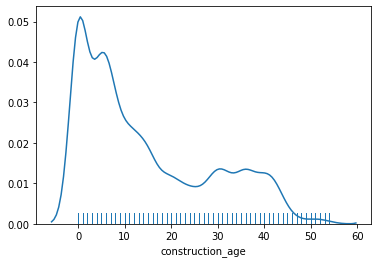

In [444]:
ax = sns.distplot(df['construction_age'], hist=False, rug=True)

In [13]:
df.population.astype('int64')
#df.construction_age.astype('int64')

0        109
1        250
2         58
3          1
4          0
        ... 
48646     89
48647    125
48648     56
48649      0
48650    150
Name: population, Length: 48651, dtype: int64

In [14]:
drop = ['source_type', 'payment', 'recorded_by','construction_year', 'date_recorded', 'quality_group','quantity_group', 'waterpoint_type_group', 'num_private','district_code', 'region_code', 'extraction_type']

In [15]:
df.drop(drop, axis=1, inplace=True)

In [16]:
df.to_csv('cleaned_df2df1_train.csv')